<div style="margin: 2em 5em 0 0;">
    
<p>
   <br>
   <span style="margin-left: 17%; vertical-align: text-bottom;"></span>
   <span style="float: right; vertical-align: text-bottom"></span>
</p>
<br>
<hr style="height: 1px; margin-top: -.2em">


<center>
   <br>
   <span style="font-size: 155%; font-weight: bold; font-family: "Times New Roman", Times, serif;">
      Unsupervised Analysis 
      <br style="margin-bottom: .6em">
      Project (Team)
   </span>
   <br>
   <br>
   <br>
   <b>Data Science: Machine Learning</b>
   <br>
   <div style="font-size: 107%; margin-top: .3em">
      <b></b>
      <br>
      <br style="margin-bottom: .5em">
      <b>Project by</b>
      <br>
      Saloni Sharma
      <br>
      Niousha Shahsavan
      <br>
      Daniel Goldshtein 
      <br>
      Mahmudjon Ruzimurodov
      <br>
      Jinsoo Whang
      <br>
      <br>
   </div>
   <div style="margin-top: .5em">January 31, 2021</div>
</center>

<br>
<br>
<span style="font-size: 120%;  font-family: "Arial", Helvetica, sans-serif;">
   <center><b>Introduction</b></center>
   <p style="text-align: justify"><i>In this notebook, we will be analyzing a survey of 137 observations with questions ranging from the Big Five personality traits as well as the Hult DNA. This survey also includes demographic questions and whether or not each observation prefers the Macbook or Windows. Apple and Microsoft have been researching several aspects of consumer buying behavior and Apple have decided to approach us to receive our findings and analysis. We will proceed to tackle this challenge by first analyzing the dataset, engineering the data to extract insights, support our insights with findings from external sources, and finally give actionable recommendations to Apple. Please find our external sources in the Bibliography at the end of this notebook. </i></p>
</div>

</div>
<br>
<br>

In [1]:
########################################
# importing packages
########################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions
import numpy             as np


# new libraries
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.manifold      import TSNE           # t-SNE
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
file = './survey_data.xlsx'
df = pd.read_excel(io = file)


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
pd.np.set_printoptions(threshold=sys.maxsize)


########################################
# chacking the type of the dataset
########################################
type(df)

<ipython-input-1-1ca56d18f6ae>:33: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.set_printoptions(threshold=sys.maxsize)


pandas.core.frame.DataFrame

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [3]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [4]:
df.describe().round(decimals=2)

,surveyID,Am_the_life_of_the_party,Feel_little_concern_for_others,Am_always_prepared,Get_stressed_out_easily,Have_a_rich_vocabulary,Don't_talk_a_lot,Am_interested_in_people,Leave_my_belongings_around,Am_relaxed_most_of_the_time,Have_difficulty_understanding_abstract_ideas,Feel_comfortable_around_people,Insult_people,Pay_attention_to_details,Worry_about_things,Have_a_vivid_imagination,Keep_in_the_background,Sympathize_with_others'_feelings,Make_a_mess_of_things,Seldom_feel_blue,Am_not_interested_in_abstract_ideas,Start_conversations,Am_not_interested_in_other_people's_problems,Get_chores_done_right_away,Am_easily_disturbed,Have_excellent_ideas,Have_little_to_say,Have_a_soft_heart,Often_forget_to_put_things_back_in_their_proper_place,Get_upset_easily,Do_not_have_a_good_imagination,Talk_to_a_lot_of_different_people_at_parties,Am_not_really_interested_in_others,Like_order,Change_my_mood_a_lot,Am_quick_to_understand_things,Don't_like_to_draw_attention_to_myself,Take_time_out_for_others,Shirk_my_duties,Have_frequent_mood_swings,Use_difficult_words,Don't_mind_being_the_center_of_attention,Feel_others'_emotions,Follow_a_schedule,Get_irritated_easily,Spend_time_reflecting_on_things,Am_quiet_around_strangers,Make_people_feel_at_ease,Am_exacting_in_my_work,Often_feel_blue,Am_full_of_ideas,See_underlying_patterns_in_complex_situations,Don't__generate_ideas_that_are_new_and_different,Demonstrate_an_awareness_of_personal_strengths_and_limitations,Display_a_growth_mindset,Respond_effectively_to_multiple_priorities,"Take_initiative_even_when_circumstances,_objectives,_or_rules_aren't_clear",Encourage_direct_and_open_discussions,Respond_effectively_to_multiple_priorities.1,"Take_initiative_even_when_circumstances,_objectives,_or_rules_aren't_clear.1",Encourage_direct_and_open_discussions.1,Listen_carefully_to_others,Don't_persuasively_sell_a_vision_or_idea,Build_cooperative_relationships,Work_well_with_people_from_diverse_cultural_backgrounds,"Effectively_negotiate_interests,_resources,_and_roles",Can't_rally_people_on_the_team_around_a_common_goal,Translate_ideas_into_plans_that_are_organized_and_realistic,Resolve_conflicts_constructively,Seek_and_use_feedback_from_teammates,Coach_teammates_for_performance_and_growth,Drive_for_results,What_is_your_age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00

In [5]:
# formatting each explanatory variable for statsmodels
for val in df:
    print(f""" '{val}',""", end='')

 'surveyID', 'Am_the_life_of_the_party', 'Feel_little_concern_for_others', 'Am_always_prepared', 'Get_stressed_out_easily', 'Have_a_rich_vocabulary', 'Don't_talk_a_lot', 'Am_interested_in_people', 'Leave_my_belongings_around', 'Am_relaxed_most_of_the_time', 'Have_difficulty_understanding_abstract_ideas', 'Feel_comfortable_around_people', 'Insult_people', 'Pay_attention_to_details', 'Worry_about_things', 'Have_a_vivid_imagination', 'Keep_in_the_background', 'Sympathize_with_others'_feelings', 'Make_a_mess_of_things', 'Seldom_feel_blue', 'Am_not_interested_in_abstract_ideas', 'Start_conversations', 'Am_not_interested_in_other_people's_problems', 'Get_chores_done_right_away', 'Am_easily_disturbed', 'Have_excellent_ideas', 'Have_little_to_say', 'Have_a_soft_heart', 'Often_forget_to_put_things_back_in_their_proper_place', 'Get_upset_easily', 'Do_not_have_a_good_imagination', 'Talk_to_a_lot_of_different_people_at_parties', 'Am_not_really_interested_in_others', 'Like_order', 'Change_my_mood_a

# Reliability of the Data Provided

There were a total of 137 observations, but we decided not to use all of them because some of the people that took the survey failed to answer the survey correctly. There were also some columns that were repeated; we decided to pick the first one of the two repeated columns because survey takers tend to bias their second repeated column based on what they remember from the first repeated column. 

In order to make our analysis simpler, we have decided to subset the survey questions into 2 categories. One included all of the questions in the Big Five personality traits and the other included all of the Hult DNA questions. Demographic questions were excluded from our analysis. In order to determine whether or not the questions belonged to Big Five personality traits or Hult DNA, we used The Big Five Personality Traits template from Temple University. (Temple University) Hult DNA questions were divided based on what we learned in our Hult Leadership Class. 

In [6]:
# do a for loop where we check the validity of the observation

# for loop with iterrows() 
for index, col in df.iterrows():
    
    
    # conditionals to delete invalid observations
    
    # Life of the party vs Feel comfortable around people
    if df.loc[index, 'Am_the_life_of_the_party'] == 5 and df.loc[index, 'Feel_comfortable_around_people'] == 1:
        df.loc[index, 'Am_the_life_of_the_party'] = np.NaN
        
    elif df.loc[index, 'Am_the_life_of_the_party'] == 1 and df.loc[index, 'Feel_comfortable_around_people'] == 5:
        df.loc[index, 'Am_the_life_of_the_party'] = np.NaN
        
        
        
    # Relaxed (Am_relaxed_most_of_the_time) vs Stressed out (Get_stressed_out_easily)
    elif df.loc[index, 'Am_relaxed_most_of_the_time'] == 5 and df.loc[index, 'Get_stressed_out_easily'] == 5:
        df.loc[index, 'Am_relaxed_most_of_the_time'] = np.NaN
        
    elif df.loc[index, 'Am_relaxed_most_of_the_time'] == 1 and df.loc[index, 'Get_stressed_out_easily'] == 1:
        df.loc[index, 'Am_relaxed_most_of_the_time'] = np.NaN
        
        
    # Little to say vs Not talk a lot
    elif df.loc[index, 'Have_little_to_say'] == 5 and df.loc[index, """Don't_talk_a_lot"""] == 1:
        df.loc[index, 'Have_little_to_say'] = np.NaN
        
    elif df.loc[index, 'Have_little_to_say'] == 1 and df.loc[index, """Don't_talk_a_lot"""] == 5:
        df.loc[index, 'Have_little_to_say'] = np.NaN
        
        
        
    # Change my mood vs Frequent mood swings
    elif df.loc[index, 'Change_my_mood_a_lot'] == 5 and df.loc[index, """Have_frequent_mood_swings"""] == 1:
        df.loc[index, 'Change_my_mood_a_lot'] = np.NaN
        
    elif df.loc[index, 'Change_my_mood_a_lot'] == 1 and df.loc[index, """Have_frequent_mood_swings"""] == 5:
        df.loc[index, 'Change_my_mood_a_lot'] = np.NaN
        
        
    # Vivid imagination (Have_a_vivid_imagination) vs Do not have a good imagination (Do_not_have_a_good_imagination)
    elif df.loc[index, 'Have_a_vivid_imagination'] == 5 and df.loc[index, 'Do_not_have_a_good_imagination'] == 5:
        df.loc[index, 'Have_a_vivid_imagination'] = np.NaN
        
    elif df.loc[index, 'Have_a_vivid_imagination'] == 1 and df.loc[index, 'Do_not_have_a_good_imagination'] == 1:
        df.loc[index, 'Have_a_vivid_imagination'] = np.NaN
        
        
     # Follow_a_schedul vs Like_order
    elif df.loc[index, 'Follow_a_schedule'] == 5 and df.loc[index, """Like_order"""] == 1:
        df.loc[index, 'Follow_a_schedule'] = np.NaN
        
    elif df.loc[index, 'Follow_a_schedule'] == 1 and df.loc[index, """Like_order"""] == 5:
        df.loc[index, 'Follow_a_schedule'] = np.NaN    
        
        
    # Get_upset_easily vs Do not have a Seldom_feel_blue
    elif df.loc[index, 'Get_upset_easily'] == 5 and df.loc[index, 'Seldom_feel_blue'] == 5:
        df.loc[index, 'Get_upset_easily'] = np.NaN
        
    elif df.loc[index, 'Get_upset_easily'] == 1 and df.loc[index, 'Seldom_feel_blue'] == 1:
        df.loc[index, 'Get_upset_easily'] = np.NaN
        
        
    # Vivid imagination (Have_a_vivid_imagination) vs Do not have a good imagination (Do_not_have_a_good_imagination)
    elif df.loc[index, 'Often_feel_blue'] == 5 and df.loc[index, 'Seldom_feel_blue'] == 5:
        df.loc[index, 'Often_feel_blue'] = np.NaN
        
    elif df.loc[index, 'Often_feel_blue'] == 1 and df.loc[index, 'Seldom_feel_blue'] == 1:
        df.loc[index, 'Often_feel_blue'] = np.NaN    
        
        
    # Vivid imagination (Have_a_vivid_imagination) vs Do not have a good imagination (Do_not_have_a_good_imagination)
    elif df.loc[index, """Sympathize_with_others'_feelings"""] == 5 and df.loc[index, """Am_not_interested_in_other_people's_problems"""] == 5:
        df.loc[index, """Sympathize_with_others'_feelings"""] = np.NaN
        
    elif df.loc[index, """Sympathize_with_others'_feelings"""] == 1 and df.loc[index, """Am_not_interested_in_other_people's_problems"""] == 1:
        df.loc[index, """Sympathize_with_others'_feelings"""] = np.NaN
        
        
        
   # Vivid imagination (Have_a_vivid_imagination) vs Do not have a good imagination (Do_not_have_a_good_imagination)
    elif df.loc[index, 'Leave_my_belongings_around'] == 5 and df.loc[index, 'Often_forget_to_put_things_back_in_their_proper_place'] == 1:
        df.loc[index, 'Leave_my_belongings_around'] = np.NaN
        
    elif df.loc[index, 'Leave_my_belongings_around'] == 1 and df.loc[index, 'Often_forget_to_put_things_back_in_their_proper_place'] == 5:
        df.loc[index, 'Leave_my_belongings_around'] = np.NaN  

 

   # Vivid imagination (Have_a_vivid_imagination) vs Do not have a good imagination (Do_not_have_a_good_imagination)
    elif df.loc[index, """Sympathize_with_others'_feelings"""] == 5 and df.loc[index, """Feel_others'_emotions"""] == 1:
        df.loc[index, """Sympathize_with_others'_feelings"""] = np.NaN
        
    elif df.loc[index, """Sympathize_with_others'_feelings"""] == 1 and df.loc[index, """Feel_others'_emotions"""] == 5:
        df.loc[index, """Sympathize_with_others'_feelings"""] = np.NaN
 


    # Vivid imagination (Have_a_vivid_imagination) vs Do not have a good imagination (Do_not_have_a_good_imagination)
    elif df.loc[index, 'Am_full_of_ideas'] == 5 and df.loc[index, """Don't__generate_ideas_that_are_new_and_different"""] == 5:
        df.loc[index, 'Am_full_of_ideas'] = np.NaN
        
    elif df.loc[index, 'Am_full_of_ideas'] == 1 and df.loc[index, """Don't__generate_ideas_that_are_new_and_different"""] == 1:
        df.loc[index, 'Am_full_of_ideas'] = np.NaN
        
        
# 2 PCAs (one for Big 5 and the other for Hult DNA)


In [7]:
# Checking how many null values
df.isnull().sum()

surveyID                                                                        0
Am_the_life_of_the_party                                                        3
Feel_little_concern_for_others                                                  0
Am_always_prepared                                                              0
Get_stressed_out_easily                                                         0
Have_a_rich_vocabulary                                                          0
Don't_talk_a_lot                                                                0
Am_interested_in_people                                                         0
Leave_my_belongings_around                                                      2
Am_relaxed_most_of_the_time                                                     2
Have_difficulty_understanding_abstract_ideas                                    0
Feel_comfortable_around_people                                                  0
Insult_people   

In [8]:
# drop observations with NAs 
df = df.dropna(axis = 0)

# drop columns that are redundant
df = df.drop(["Respond_effectively_to_multiple_priorities.1",
              "Take_initiative_even_when_circumstances,_objectives,_or_rules_aren't_clear.1",
               "Encourage_direct_and_open_discussions.1"], axis=1)


In [9]:
# Checking how many null values
df.isnull().sum()

surveyID                                                                      0
Am_the_life_of_the_party                                                      0
Feel_little_concern_for_others                                                0
Am_always_prepared                                                            0
Get_stressed_out_easily                                                       0
Have_a_rich_vocabulary                                                        0
Don't_talk_a_lot                                                              0
Am_interested_in_people                                                       0
Leave_my_belongings_around                                                    0
Am_relaxed_most_of_the_time                                                   0
Have_difficulty_understanding_abstract_ideas                                  0
Feel_comfortable_around_people                                                0
Insult_people                           

In [10]:
# Categorizing the questions to the Big 5 Personality traits

# Placeholder for Big 5 Personality Traits
df['extroversion'] = 0
df['agreeableness'] = 0
df['conscientiousness'] = 0
df['neuroticism'] = 0
df['openness_to_experience'] = 0
df['thinking'] = 0
df['communicating'] = 0
df['team_building'] = 0

# for loop to get the Personality Trait score of each observation 
for index, column in df.loc[ : , : ].iterrows():

    df.loc[index, 'extroversion'] = [20 + df.loc[index, 'Am_the_life_of_the_party']
                    -df.loc[index, """Don't_talk_a_lot"""]
                    +df.loc[index, """Feel_comfortable_around_people"""]
                    -df.loc[index, """Keep_in_the_background"""]
                    +df.loc[index, """Start_conversations"""]
                    -df.loc[index, """Have_little_to_say"""]
                    +df.loc[index, """Talk_to_a_lot_of_different_people_at_parties"""]
                    -df.loc[index, """Don't_like_to_draw_attention_to_myself"""]
                    +df.loc[index, """Don't_mind_being_the_center_of_attention"""]
                    -df.loc[index, """Am_quiet_around_strangers"""]]
    
    df.loc[index, 'agreeableness'] = [14 - df.loc[index, 'Feel_little_concern_for_others']
                     +df.loc[index, 'Am_interested_in_people']
                     -df.loc[index, 'Insult_people']
                     +df.loc[index, """Sympathize_with_others'_feelings"""]
                     -df.loc[index, """Am_not_interested_in_other_people's_problems"""]                             
                     +df.loc[index, 'Have_a_soft_heart']
                     -df.loc[index, 'Am_not_really_interested_in_others']
                     +df.loc[index, 'Take_time_out_for_others']
                     +df.loc[index, """Feel_others'_emotions"""]                
                     +df.loc[index, 'Make_people_feel_at_ease']]
    
    df.loc[index, 'conscientiousness'] = [14 + df.loc[index, 'Am_always_prepared']
                         -df.loc[index, 'Leave_my_belongings_around']
                         +df.loc[index, 'Pay_attention_to_details']
                         -df.loc[index, 'Make_a_mess_of_things']
                         +df.loc[index, 'Get_chores_done_right_away']
                         -df.loc[index, 'Often_forget_to_put_things_back_in_their_proper_place']
                         +df.loc[index, 'Like_order']
                         -df.loc[index, 'Shirk_my_duties']
                         +df.loc[index, 'Follow_a_schedule']
                         +df.loc[index, 'Am_exacting_in_my_work']]
    
    df.loc[index, 'neuroticism'] = [38 - df.loc[index, 'Get_stressed_out_easily']
                   +df.loc[index,'Am_relaxed_most_of_the_time']
                   -df.loc[index,'Worry_about_things']
                   +df.loc[index,'Seldom_feel_blue']
                   -df.loc[index,'Am_easily_disturbed']
                   -df.loc[index,'Get_upset_easily']
                   -df.loc[index,'Change_my_mood_a_lot']
                   -df.loc[index,'Have_frequent_mood_swings']
                   -df.loc[index,'Get_irritated_easily']
                   -df.loc[index,'Often_feel_blue']]

    
    df.loc[index, 'openness_to_experience'] = [8 + df.loc[index, 'Have_a_rich_vocabulary']
                                               -df.loc[index, 'Have_difficulty_understanding_abstract_ideas']
                                               +df.loc[index, 'Have_a_vivid_imagination']
                                               -df.loc[index, 'Am_not_interested_in_abstract_ideas']
                                               +df.loc[index, 'Have_excellent_ideas']
                                               -df.loc[index, 'Do_not_have_a_good_imagination']
                                               +df.loc[index, 'Am_quick_to_understand_things']
                                               +df.loc[index, 'Use_difficult_words']
                                               +df.loc[index, 'Spend_time_reflecting_on_things']
                                               +df.loc[index, 'Am_full_of_ideas']]
    
    df.loc[index, 'thinking'] = [df.loc[index, 'See_underlying_patterns_in_complex_situations']
                                               -df.loc[index, """Don't__generate_ideas_that_are_new_and_different"""]
                                               +df.loc[index, 'Demonstrate_an_awareness_of_personal_strengths_and_limitations']
                                               +df.loc[index, 'Display_a_growth_mindset']]                    
    
    df.loc[index, 'communicating'] = [df.loc[index, 'Respond_effectively_to_multiple_priorities']
                                               +df.loc[index, """Take_initiative_even_when_circumstances,_objectives,_or_rules_aren't_clear"""]
                                               +df.loc[index, 'Encourage_direct_and_open_discussions']
                                               +df.loc[index, 'Listen_carefully_to_others']
                                               -df.loc[index, """Don't_persuasively_sell_a_vision_or_idea"""]]
                                                                                                             
    df.loc[index, 'team_building'] = [df.loc[index, 'Build_cooperative_relationships']
                                               +df.loc[index, 'Work_well_with_people_from_diverse_cultural_backgrounds']
                                               +df.loc[index, 'Effectively_negotiate_interests,_resources,_and_roles']
                                               -df.loc[index, """Can't_rally_people_on_the_team_around_a_common_goal"""]
                                               +df.loc[index, 'Translate_ideas_into_plans_that_are_organized_and_realistic']
                                               +df.loc[index, 'Resolve_conflicts_constructively']
                                               +df.loc[index, 'Seek_and_use_feedback_from_teammates']
                                               +df.loc[index, 'Coach_teammates_for_performance_and_growth']
                                               +df.loc[index, 'Drive_for_results']]
                                              


                                                     
                         
                           
                             
                    
                                                
                                       
                                   


# PCA, Agglomerative Clustering and Demographic Analisis for Big 5 Personality Traits 

In [11]:
# subsetting to Big 5 Personality Traits questions
big_5_df = df.iloc[: , 76:81]

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(big_5_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(big_5_df)


# converting scaled data into a DataFrame
big_5_scaled = pd.DataFrame(X_scaled)


# reattaching column names
big_5_scaled.columns = big_5_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(big_5_df), '\n\n')
print(pd.np.var(big_5_scaled))

extroversion              42.189012
agreeableness             30.188488
conscientiousness         28.201939
neuroticism               43.762250
openness_to_experience    30.688444
dtype: float64 


extroversion              1.0
agreeableness             1.0
conscientiousness         1.0
neuroticism               1.0
openness_to_experience    1.0
dtype: float64


<ipython-input-11-9bc390414830>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(big_5_df), '\n\n')
<ipython-input-11-9bc390414830>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(big_5_scaled))


In [12]:
# INSTANTIATING a PCA model
pca = PCA(n_components = None,   # number of principal components to develop
          random_state = 219)


# FITTING and TRANSFORMING the digits data
big_5_pca = pca.fit_transform(big_5_df)

# comparing dimensions of each DataFrame
print("Original shape:", big_5_df.shape)
print("PCA shape     :", big_5_pca.shape)

Original shape: (107, 5)
PCA shape     : (107, 5)


In [13]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.349
PC 2 : 0.222
PC 3 : 0.201
PC 4 : 0.124
PC 5 : 0.104


In [14]:
print(pca.explained_variance_ratio_.sum())


0.9999999999999998


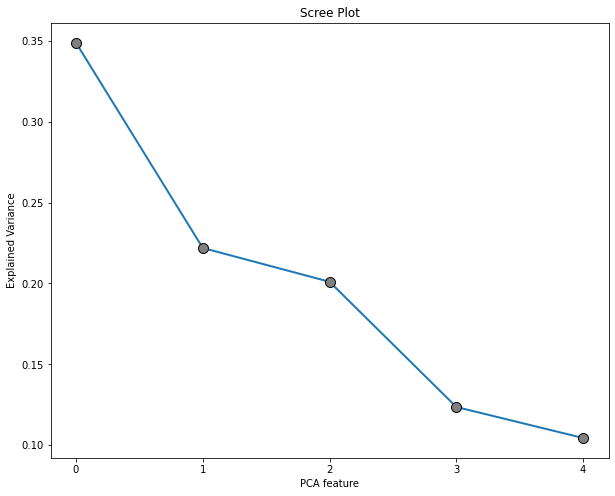

In [15]:
# calling the scree_plot function
scree_plot(pca_object = pca)

In [16]:
# transposing pca components
big_5_factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
big_5_factor_loadings_df = big_5_factor_loadings_df.set_index(big_5_scaled.columns)


# checking the result
print(big_5_factor_loadings_df)


# saving to Excel
big_5_factor_loadings_df.to_excel('big_5_factor_loadings.xlsx')

                               0         1         2         3         4
extroversion           -0.512034  0.531120 -0.636053 -0.117112 -0.193531
agreeableness          -0.417103  0.100094  0.404002 -0.667904  0.454635
conscientiousness      -0.372987 -0.086561  0.474768 -0.031846 -0.791814
neuroticism            -0.515639 -0.780067 -0.301658  0.119633  0.142487
openness_to_experience -0.398552  0.303142  0.340320  0.724474  0.329516


<ipython-input-16-bb4896092d12>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  big_5_factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


In [17]:
# naming each principal component
big_5_factor_loadings_df.columns = ['Conservative',                
                              'Reliant & Self Aware',                            
                              'Organized Shy',        
                              'Find Oneself',              
                              'Nervous Nelly']     


# checking the result
big_5_factor_loadings_df

,Conservative,Reliant & Self Aware,Organized Shy,Find Oneself,Nervous Nelly
extroversion,-0.512034,0.531120,-0.636053,-0.117112,-0.193531
agreeableness,-0.417103,0.100094,0.404002,-0.667904,0.454635
conscientiousness,-0.372987,-0.086561,0.474768,-0.031846,-0.791814
neuroticism,-0.515639,-0.780067,-0.301658,0.119633,0.142487
openness_to_experience,-0.398552,0.303142,0.340320,0.724474,0.329516


In [18]:
# checking variance amongst clusters
np.var(big_5_factor_loadings_df)

Conservative            0.003518
Reliant & Self Aware    0.199817
Organized Shy           0.196833
Find Oneself            0.199970
Nervous Nelly           0.199862
dtype: float64

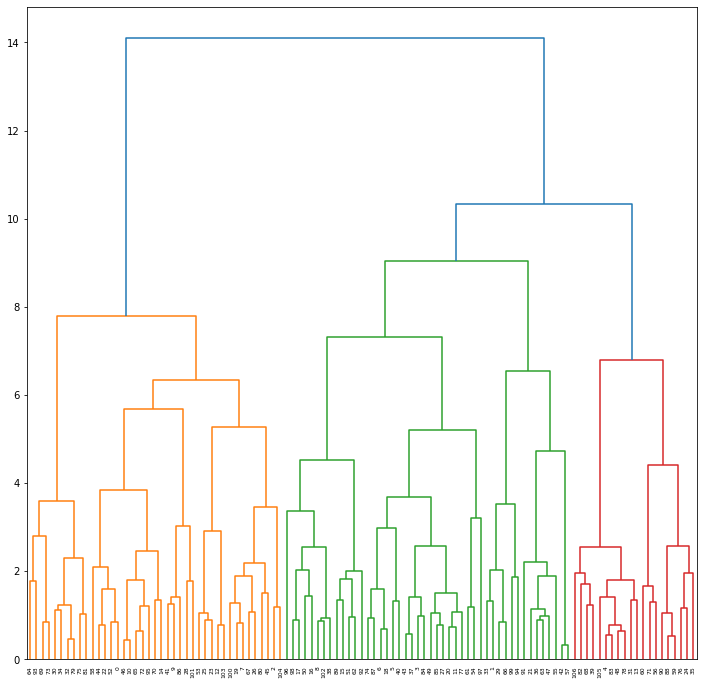

In [19]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = big_5_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./big_5_clust_ward.png')
plt.show()

In [20]:
# INSTANTIATING a k-Means object with clusters
big_5_pca = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
big_5_pca.fit(big_5_scaled)


# converting the clusters to a DataFrame
big_5_kmeans_pca = pd.DataFrame({'Cluster': big_5_pca.labels_})


# checking the results
print(big_5_kmeans_pca.iloc[: , 0].value_counts())

0    29
2    23
3    21
4    17
1    17
Name: Cluster, dtype: int64


In [21]:
# storing cluster centers
big_5_centroids_pca = big_5_pca.cluster_centers_


# converting cluster centers into a DataFrame
big_5_centroids_pca_df = pd.DataFrame(big_5_centroids_pca)


# renaming principal components
big_5_centroids_pca_df.columns = ['Conservative',                
                              'Reliant & Self Aware',                            
                              'Organized Shy',        
                              'Find Oneself',              
                              'Nervous Nelly']  


# checking results (clusters = rows, pc = columns)
big_5_centroids_pca_df.round(2)

,Conservative,Reliant & Self Aware,Organized Shy,Find Oneself,Nervous Nelly
0,-0.13,-0.77,-0.85,-0.98,-0.17
1,1.13,1.08,0.91,0.22,0.75
2,0.81,-0.10,-0.06,0.82,-0.02
3,-0.85,-0.06,-0.09,0.13,-1.12
4,-0.95,0.45,0.73,0.17,0.94


In [22]:
big_5_df = big_5_df.reset_index(drop=True)


# concatenating cluster memberships with principal components
big_5_clst_pca_df = pd.concat([big_5_kmeans_pca,
                         big_5_scaled],
                         axis = 1)


# checking results
big_5_clst_pca_df


# concatenating demographic information with pca-clusters
big_5_final_pca_clust_df = pd.concat([df.loc[ : , ['What_laptop_do_you_currently_have?']].reset_index(drop=True),
                                big_5_clst_pca_df],
                                axis = 1)


# renaming columns
big_5_final_pca_clust_df.columns = ['What_laptop_do_you_currently_have?',
                              'Cluster',
                              'Conservative',                
                              'Reliant & Self Aware',                            
                              'Organized Shy',        
                              'Find Oneself',              
                              'Nervous Nelly']


# checking the results
print(big_5_final_pca_clust_df.head(n = 5))

  What_laptop_do_you_currently_have?  Cluster  Conservative  Reliant & Self Aware  Organized Shy  Find Oneself  Nervous Nelly
0                            Macbook        2      0.241727             -0.387820       0.913364     -0.220390      -0.350907
1                     Windows laptop        4     -0.835974             -0.569823       0.348451     -0.371554       0.551666
2                     Windows laptop        2      0.549642             -2.025850       0.348451      1.593586      -0.711936
3                     Windows laptop        0     -0.374102              0.886203      -0.969680     -0.371554       0.371152
4                            Macbook        0      0.087770             -1.115833      -0.969680     -0.825048      -0.711936


In [23]:
# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


big_5_final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
big_5_data_df = big_5_final_pca_clust_df


# checking results
big_5_data_df

,What_laptop_do_you_currently_have?,Cluster,Conservative,Reliant & Self Aware,Organized Shy,Find Oneself,Nervous Nelly
0,Macbook,Cluster 3,0.241727,-0.387820,0.913364,-0.220390,-0.350907
1,Windows laptop,Cluster 5,-0.835974,-0.569823,0.348451,-0.371554,0.551666
2,Windows laptop,Cluster 3,0.549642,-2.025850,0.348451,1.593586,-0.711936
3,Windows laptop,Cluster 1,-0.374102,0.886203,-0.969680,-0.371554,0.371152
4,Macbook,Cluster 1,0.087770,-1.115833,-0.969680,-0.825048,-0.711936
5,Macbook,Cluster 1,-0.989931,0.340193,-1.722897,-1.732036,-0.711936
6,Windows laptop,Cluster 1,-0.374102,0.158190,-0.969680,-1.429707,-0.350907
7,Windows laptop,Cluster 3,1.319429,0.158190,0.536756,1.291257,0.371152
8,Macbook,Cluster 4,-0.528059,-0.569823,0.348451,0.081940,-1.072966
9,Windows laptop,Cluster 2,-0.066187,1.978223,-0.028158,0.384269,0.732181


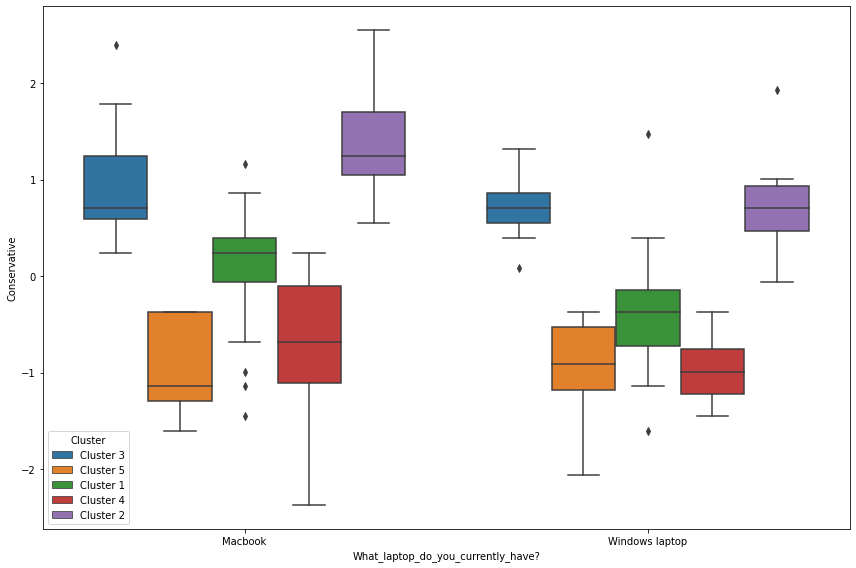

In [24]:
########################
# Macbook vs Windows
########################

# Conservative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What_laptop_do_you_currently_have?',
            y = 'Conservative',
            hue = 'Cluster',
            data = big_5_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

The boxplot shows a clear depiction that people who prefer a mac are more open to new experiences than windows users. Per our research, Apple already utilizes this segment by pitching themselves as innovative, artistic and simple. (Montalbano and Service, 2021)
 
The 2 pillars for targeting a personality that resonates with openness is “Creativity” & “Curiosity”. (Rivera, 2019)

<b>Recommendation</b>

Apple already has multiple “think different” kind of campaigns, so how do we level up?
Our recommendation is to opt for guerilla marketing. We want apple to collaborate with multiple  street artists to come up with their version of “Think different” before the launch of a new Macbook. They can then use as advertising and stimulate inquisitiveness among the minds of our target personality. This also aligns with their brand values and keeps consistent with their value of innovation with creativity. ("20+ Jaw-Dropping Guerrilla Marketing Examples", 2021)


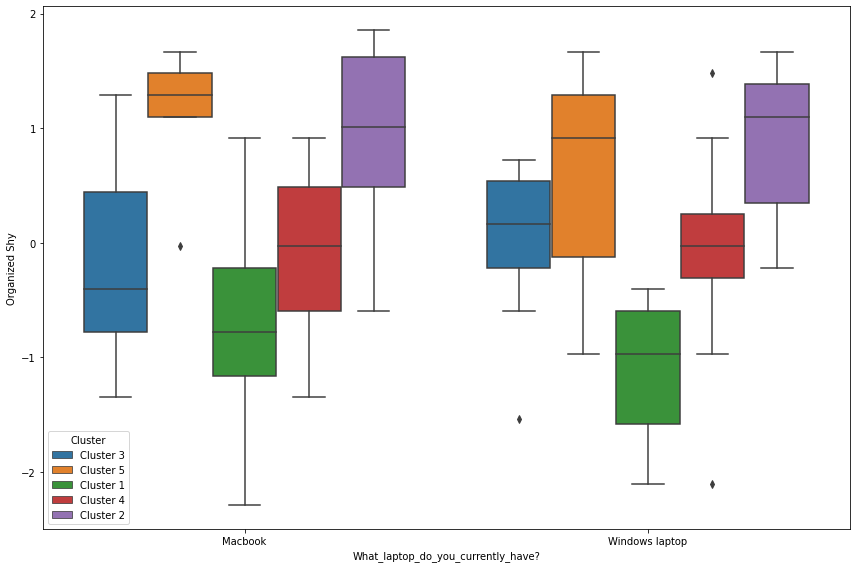

In [25]:
########################
# Macbook vs Windows
########################

# Organized Shy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What_laptop_do_you_currently_have?',
            y = 'Organized Shy',
            hue = 'Cluster',
            data = big_5_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

From the boxplot, for conscientiousness people with this trait tend to be purchasing more Windows than Macbook. 
For targeting someone who has more conscientiousness we need to focus on efficiency, organization and be easy going.
 
<b> Recommendations </b>

Apple generally focuses on subtle product placements as a part of their advertising. We can use this to our advantage and have a product placement in movie and TV shows where the character’s persona is much like a person with “conscientiousness” which sublime messaging for this target audience.
We also suggest focusing on corporate events with themes of “Apple Expo but for corporates” where employees and organizations interact with the brand to learn efficiency in the workplace with Mac. (Thomas,2019)


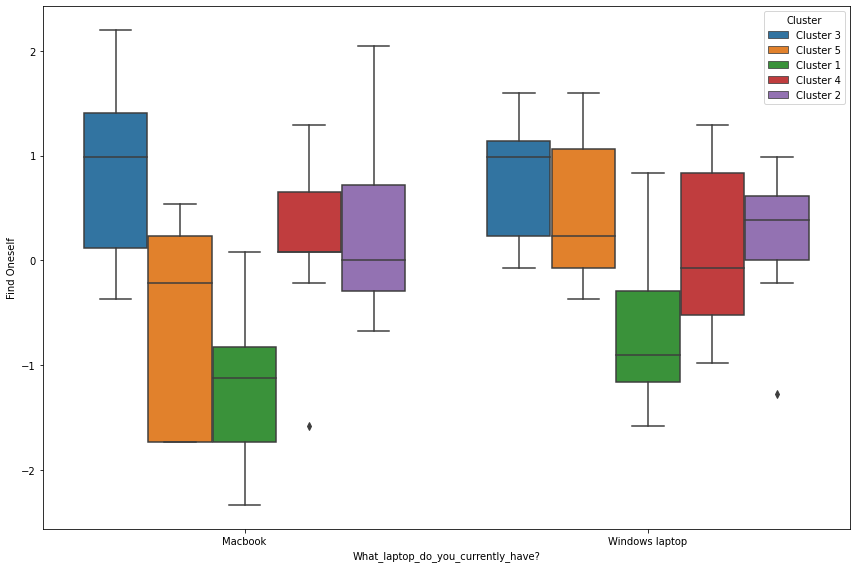

In [26]:
########################
# Macbook vs Windows
########################

# Find Oneself
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What_laptop_do_you_currently_have?',
            y = 'Find Oneself',
            hue = 'Cluster',
            data = big_5_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

The consumers with extroversion as their traits are prone to purchasing more Windows than Macbooks.  
To target someone with traits of extroversion we focus on being positive, social and engaging. (Rivera, 2019)

 
<b> Recommendations </b>
 
A very simple yet elegant solution for marketing to an extrovert is including them in social events this could be an Apple apex event, launch event or special events hosted yearly. But especially during a pandemic, Apple can target this persona by hosting social media events such as Instagram lives and hackathons that give them a chance to engage with each other and make them feel they are a part of something bigger.


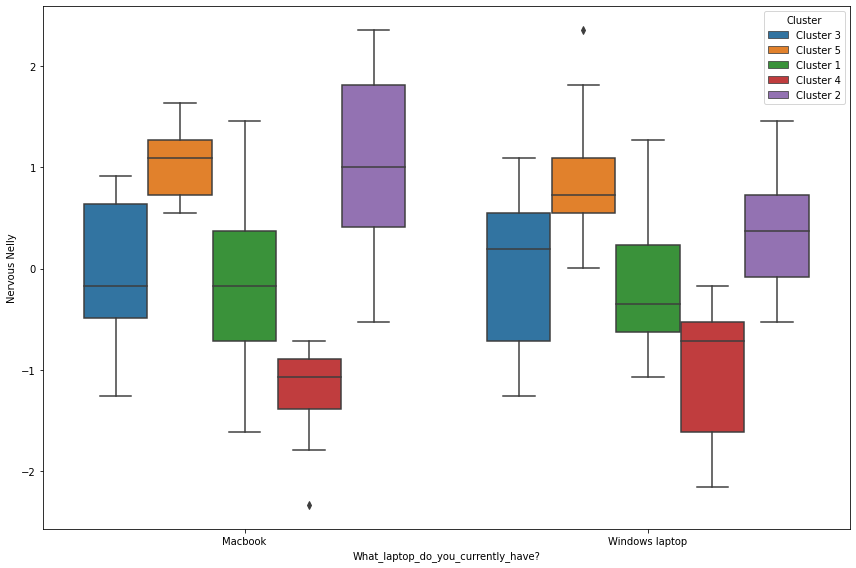

In [27]:
########################
# Macbook vs Windows
########################

# Nervous Nelly
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What_laptop_do_you_currently_have?',
            y = 'Nervous Nelly',
            hue = 'Cluster',
            data = big_5_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

When looking at nervous Nelly, we can see a mixture of both purchases across Macbook and Windows laptop. Cluster 2 tends to be the highest for Macbook. This might be due to the fact that they score the highest in conscientiousness. They tend to like things organized and tidy. Apple tends to store everything in one place and it is very easy for people to organize everything into one place. However, cluster 4 and cluster 3 score lower in Macbook as compared to Windows laptop. This is because this group is not quite conservative and they tend to be more introverts. Also, they are less organized as compared to other groups. 

<b> Recommendations </b>

For cluster 3 and 4 since they tend to be introverted, Apple should focus on simplicity as their content as well as target mediums such as podcasts and blogs for communication as they require the least interaction and can prove to be beneficial for the message we are trying to communicate. 


# PCA, Agglomerative Clustering and Demographic Analisis for  Hult DNA

In [28]:
# subsetting to Hult DNA questions
hult_dna_df = df.iloc[: , 81:84]

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_dna_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(hult_dna_df)


# converting scaled data into a DataFrame
hult_dna_scaled = pd.DataFrame(X_scaled)


# reattaching column names
hult_dna_scaled.columns = hult_dna_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(hult_dna_df), '\n\n')
print(pd.np.var(hult_dna_scaled))

thinking          5.014062
communicating     6.999039
team_building    18.080531
dtype: float64 


thinking         1.0
communicating    1.0
team_building    1.0
dtype: float64


<ipython-input-28-e9e8d4e9a9b9>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_dna_df), '\n\n')
<ipython-input-28-e9e8d4e9a9b9>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_dna_scaled))


In [29]:
# INSTANTIATING a PCA model
pca = PCA(n_components = None,   # number of principal components to develop
          random_state = 219)


# FITTING and TRANSFORMING the digits data
hult_dna_pca = pca.fit_transform(hult_dna_df)

# comparing dimensions of each DataFrame
print("Original shape:", hult_dna_df.shape)
print("PCA shape     :", hult_dna_pca.shape)

Original shape: (107, 3)
PCA shape     : (107, 3)


In [30]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.831
PC 2 : 0.108
PC 3 : 0.061


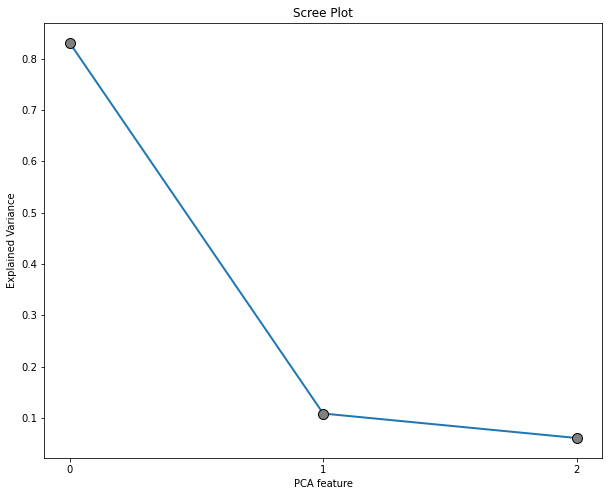

In [31]:
# calling the scree_plot function
scree_plot(pca_object = pca)

In [32]:
# transposing pca components
hult_dna_factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
hult_dna_factor_loadings_df = hult_dna_factor_loadings_df.set_index(hult_dna_scaled.columns)


# checking the result
print(hult_dna_factor_loadings_df)


# saving to Excel
hult_dna_factor_loadings_df.to_excel('hult_dna_factor_loadings_df.xlsx')

                      0         1         2
thinking      -0.350523  0.486432  0.800324
communicating -0.442240  0.667304 -0.599274
team_building -0.825565 -0.563994 -0.018786


<ipython-input-32-c29ec3fccc4c>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  hult_dna_factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


In [33]:
# naming each principal component
hult_dna_factor_loadings_df.columns = ['Disinterested Student',   # No thinking # No Communicating # No Team Building
                                       'Lone Wolf',             
                                       'Mastermind']              # Thinking    # No Communicating # No Team Building
                              
# checking the result
hult_dna_factor_loadings_df

,Disinterested Student,Lone Wolf,Mastermind
thinking,-0.350523,0.486432,0.800324
communicating,-0.442240,0.667304,-0.599274
team_building,-0.825565,-0.563994,-0.018786


In [34]:
# checking variance amongst clusters
np.var(hult_dna_factor_loadings_df)

Disinterested Student    0.042335
Lone Wolf                0.294689
Mastermind               0.329642
dtype: float64

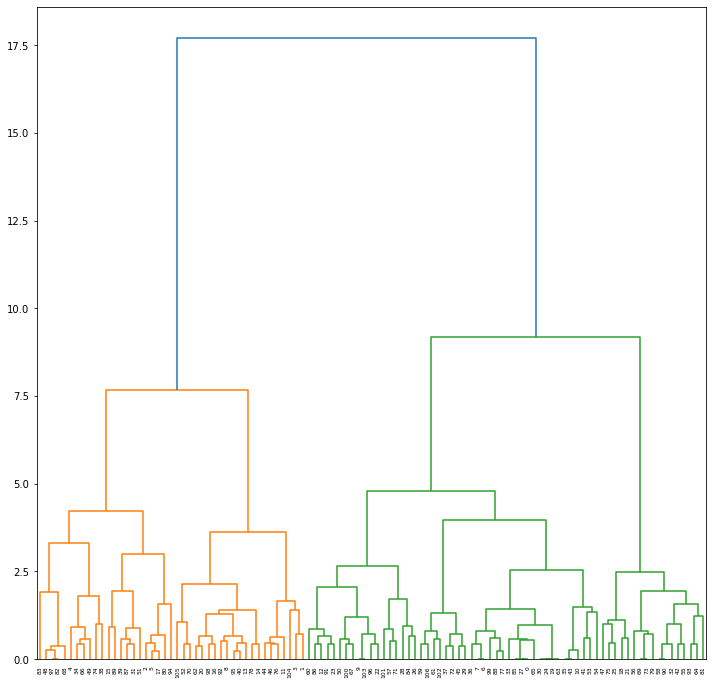

In [35]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = hult_dna_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./hult_dna_clust_ward.png')
plt.show()

In [36]:
# INSTANTIATING a k-Means object with clusters
hult_dna_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
hult_dna_pca.fit(hult_dna_scaled)


# converting the clusters to a DataFrame
hult_dna_kmeans_pca = pd.DataFrame({'Cluster': hult_dna_pca.labels_})


# checking the results
print(hult_dna_kmeans_pca.iloc[: , 0].value_counts())

0    42
1    35
2    30
Name: Cluster, dtype: int64


In [37]:
# storing cluster centers
hult_dna_centroids_pca = hult_dna_pca.cluster_centers_


# converting cluster centers into a DataFrame
hult_dna_centroids_pca_df = pd.DataFrame(hult_dna_centroids_pca)


# renaming principal components
hult_dna_centroids_pca_df.columns = ['Disinterested Student',   # No thinking # No Communicating # No Team Building
                                       'Lone Wolf',             
                                       'Mastermind']              # Thinking    # No Communicating # No Team Building


# checking results (clusters = rows, pc = columns)
hult_dna_centroids_pca_df.round(2)

,Disinterested Student,Lone Wolf,Mastermind
0,0.09,0.04,0.14
1,-1.03,-1.01,-1.01
2,1.07,1.13,0.99


In [38]:
# concatenating cluster memberships with principal components
hult_dna_clst_pca_df = pd.concat([hult_dna_kmeans_pca,
                         hult_dna_scaled],
                         axis = 1)


# checking results
hult_dna_clst_pca_df


# concatenating demographic information with pca-clusters
hult_dna_final_pca_clust_df = pd.concat([df.loc[ : , ['What_laptop_do_you_currently_have?']].reset_index(drop=True),
                                hult_dna_clst_pca_df],
                                axis = 1)


# renaming columns
hult_dna_final_pca_clust_df.columns = ['What_laptop_do_you_currently_have?', 
                                       'Cluster',
                                       'Disinterested Student',   
                                       'Lone Wolf',             
                                       'Mastermind'] 


# checking the results
print(hult_dna_final_pca_clust_df.head(n = 5))

  What_laptop_do_you_currently_have?  Cluster  Disinterested Student  Lone Wolf  Mastermind
0                            Macbook        0               0.158601  -0.052989    0.182427
1                     Windows laptop        0              -0.734571   1.080982    0.182427
2                     Windows laptop        1              -0.287985  -0.808970   -0.758280
3                     Windows laptop        0              -0.734571   1.080982    0.887957
4                            Macbook        1              -0.734571  -1.564951   -1.934164


In [39]:
# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}


hult_dna_final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
hult_dna_data_df = hult_dna_final_pca_clust_df


# checking results
hult_dna_data_df

,What_laptop_do_you_currently_have?,Cluster,Disinterested Student,Lone Wolf,Mastermind
0,Macbook,Cluster 1,0.158601,-0.052989,0.182427
1,Windows laptop,Cluster 1,-0.734571,1.080982,0.182427
2,Windows laptop,Cluster 2,-0.287985,-0.808970,-0.758280
3,Windows laptop,Cluster 1,-0.734571,1.080982,0.887957
4,Macbook,Cluster 2,-0.734571,-1.564951,-1.934164
5,Macbook,Cluster 2,-0.287985,-1.186961,-0.758280
6,Windows laptop,Cluster 1,0.158601,-0.052989,0.652780
7,Windows laptop,Cluster 1,0.158601,-0.052989,0.652780
8,Macbook,Cluster 1,-0.734571,-0.430980,0.182427
9,Windows laptop,Cluster 3,1.051773,0.325001,0.887957


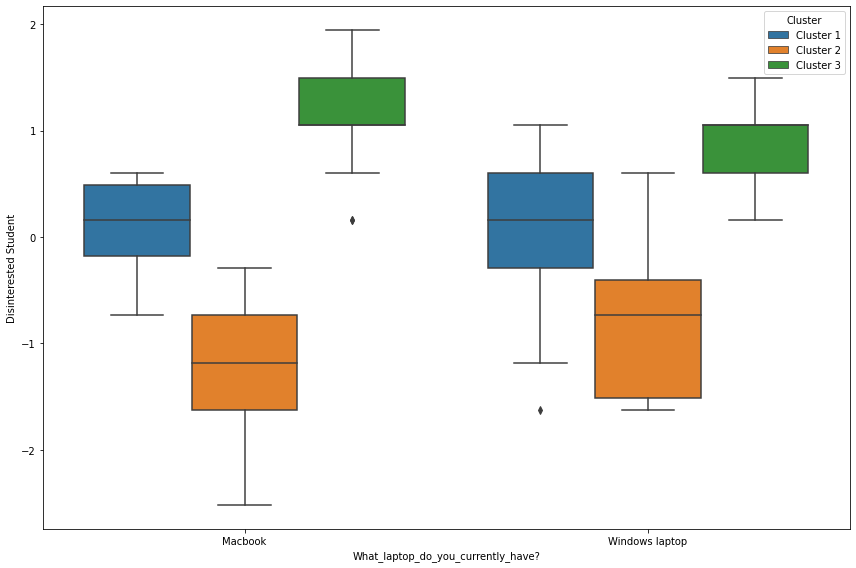

In [40]:
########################
# Macbook vs Windows
########################

# Disinterested Student
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What_laptop_do_you_currently_have?',
            y = 'Disinterested Student',
            hue = 'Cluster',
            data = hult_dna_data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

In this group, we can see that cluster 3 tends to score higher in Windows laptop rather than Macbook. This group of people score higher in thinking and working alone. They are also disinterested in other people's work and tend to like working alone more. This might be due to the fact that they are hard thinkers and they have access to many more apps that are free as compared to Macbook users. Also, these people tend to like customization which windows gives them that opportunity. However, with a Macbook, you don't get much room for customization. According to an article, people that use windows tend to think more and care about their needs more rather than just buying a computer to fit into a social group. Our recommendation to Apple would be to try to focus on this group by using marketing methods which interacts with the brain of the customers rather than their heart. They need to use logical reasoning behind why a customer needs to use a Macbook rather than a windows.

<b> Recommendations </b>

 It would be helpful for Apple to make a use of influencers that are in the technology industry such as Andrew Ng and Alex Wolf to use Apple products so that the customers using Macbook can change their perception about Apple. 


# Conclusion 

If Apple decides to take actions based on the recommendations provided above, Apple will be able to pull customers from its competitors and also retain their customers because their needs are being met. It seems that some of the people’s personalities and qualities tend to reflect their buying behavior. 

Our analysis was able to segment people based on their personalities and our recommendations reflect ideal ways (based on external research) to drive their consumer behaviour. 
The analysis and recommendation provide useful insights to target new groups based on their personality and retain the already existing consumer base with actionable steps. 


# Bibliography 

20+ Jaw-Dropping Guerrilla Marketing Examples. (2021). Retrieved 1 February 2021, from 
https://www.wordstream.com/blog/ws/2014/09/22/guerrilla-marketing-examples

A Five-Factor Theory of Personality. (1997). In D.C. Founder & D. J. Ozer (Eds.), Pieces of the 
Personality Puzzle (vol. 4, pp78-89). New York, NY: W.W. Norton & Company.

Apple, INC. (2006). Buy a mac [video file] retrieved from 
http://www.youtube.com/watch?v=QJPqLZNdMQs 

Appelt, Diana. “Marketing Strategies & How to Find Your Own Unique Space.” Captevrix, 26 
Sept. 2018, https://www.captevrix.com/news/apple-vs-microsoft-their-different-marketing-strategies-how-to-find-your-own-unique-space.

Ford, K. & Hunch INC. (2009). Mac vs PC People: Personality Traits & Aesthetic/Media Choices 
Hunch  Study.  Retrieved March 2010 from Hunch Inc’s website: http://hunch.com/media/reports/macpc/

Johansson, A. (2019, October 21). Final Verdict: Why People Prefer MacBooks Over Other 
Laptops. Retrieved February 01, 2021, from https://eshop.macsales.com/blog/54446-the-final-verdict-on-why-people-prefer-macbooks-over-other-laptops/

Kulkarni, Chirag. “10 Things You Need to Learn From Apple's Marketing.” Entrepreneur, 8 Sept. 
2016, www.entrepreneur.com/article/280692. 

Montalbano, E. and Service, I., 2021. 'Mac People' More Open, Liberal Than PC Users?. 
[online] PCWorld. Available at: <https://www.pcworld.com/article/141473/article.html> [Accessed 1 February 2021]. 

Temple University. The Big Five Personality Test (BFPT). 1 Oct. 2018, 
sites.temple.edu/rtassessment/files/2018/10/Table_BFPT.pdf. 

Thomas, Jacob. “10 Imaginative Events from Apple.” Bizzabo Blog: Inspiring Content for Event 
Professionals, 19 May 2019, https://blog.bizzabo.com/apple-event-marketing

Villas-Boas, A. (2018, May 28). 10 reasons to get an Apple Mac instead of a Windows PC. 
Retrieved February 01, 2021, from https://www.businessinsider.com/apple-mac-os-vs-microsoft-windows-10-2018-5#1-macs-are-easier-to-buy-1 
